In [1]:
from os.path import join

import numpy as np
from scipy.io import loadmat
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
dogdata_w_mat = loadmat(join('..', 'DATA', 'dogData_w.mat'))
catdata_w_mat = loadmat(join('..', 'DATA', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

_, nimages = dog_wave.shape
ntrain = 40
ntest = nimages - ntrain

train = np.hstack(
    [dog_wave[:, :ntrain], cat_wave[:, :ntrain]]
)
test = np.hstack(
    [dog_wave[:, ntrain:], cat_wave[:, ntrain:]]
)
labels = np.repeat([1, 0], ntrain)
truth = np.repeat([1, 0], ntest)

In [3]:
classifier = MLPClassifier(hidden_layer_sizes=(10,), solver='lbfgs', activation='tanh', random_state=42).fit(train.T, labels)
predictions = classifier.predict(test.T)

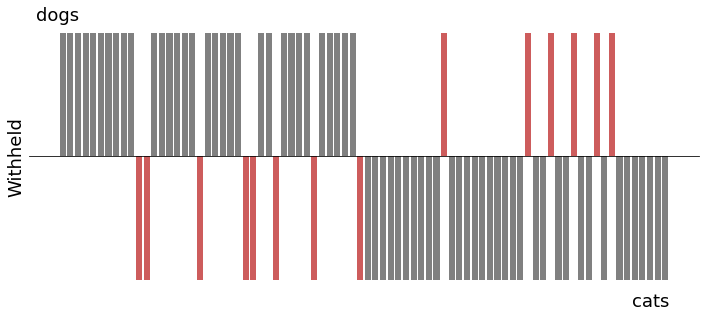

In [4]:
# Figure 6.6 (equivalent)

fig, ax = plt.subplots(figsize=(12, 5))
accurate = np.logical_not(predictions ^ truth)
colors = ['grey' if item else 'indianred' for item in accurate]
ax.bar(range(1, 2*ntest+1), predictions - 0.5, color=colors)
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_ticks([])
for loc in ['left', 'right', 'top']:
    ax.spines[loc].set_visible(False)
    ax.spines['bottom'].set_position('zero')
ax.set_ylabel('Withheld')
ax.text(0.01, 1, 'dogs', transform=ax.transAxes)
ax.text(0.9, -0.05, 'cats', transform=ax.transAxes);